# Perhitungan Skor RNN-IDS

## Import All Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math

## Load All the Data

In [2]:
df_pred = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/results/vector/part_1_Treatment_training_21_run7/result-lstm-tcp21-hl2-seq2-do0.2-oov3000-part_9_Treatment_testing_21.csv', 
                      names=['id', 'binary_error', 'b_mean', 'b_iqr', 'b_zscore', 'floatin_error', 'f_mean', 'f_iqr', 'f_zscore'])

df_truth = pd.read_csv('/home/apta/neuralnetwork-AD/rnn-apta/texts_retraining/texts_retraining_21/part_9_ground_truth.csv', 
                       encoding='ISO-8859-1')


In [3]:
df_pred.head()

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore
0,192.168.10.9-3856-192.168.10.50-21-tcp,0.367816,1,0,0,4914.529412,0,0,0
1,192.168.10.8-54566-192.168.10.50-21-tcp,0.367816,1,0,0,3175.800000,0,0,0
2,192.168.10.5-56939-192.168.10.50-21-tcp,0.367816,1,0,0,3532.305882,0,0,0
3,192.168.10.15-55270-192.168.10.50-21-tcp,0.367816,1,0,0,5476.882353,0,0,0
4,192.168.10.12-38566-192.168.10.50-21-tcp,0.333333,0,0,0,5064.882353,0,0,0


In [4]:
df_truth.head()

,ID,Label
0,192.168.10.9-3856-192.168.10.50-21-tcp,BENIGN
1,192.168.10.8-54566-192.168.10.50-21-tcp,BENIGN
2,192.168.10.5-56939-192.168.10.50-21-tcp,BENIGN
3,192.168.10.15-55270-192.168.10.50-21-tcp,BENIGN
4,192.168.10.12-38566-192.168.10.50-21-tcp,BENIGN


In [5]:
df_pred[['b_iqr']].value_counts()

b_iqr
1        515
0        109
Name: count, dtype: int64

## Exploratory Data Analysis

In [6]:
df_pred[['b_iqr']].value_counts()

b_iqr
1        515
0        109
Name: count, dtype: int64

In [7]:
df_pred[['b_zscore']].value_counts()

b_zscore
1           411
0           213
Name: count, dtype: int64

In [8]:
df_truth.isnull().sum()

ID       0
Label    0
dtype: int64

## Data Pre-Processing

### Convert the type of the data

In [9]:
df_truth['Label'].head()

0    BENIGN
1    BENIGN
2    BENIGN
3    BENIGN
4    BENIGN
Name: Label, dtype: object

## Making Predictions

In [10]:
df_pred["id"]

0        192.168.10.9-3856-192.168.10.50-21-tcp
1       192.168.10.8-54566-192.168.10.50-21-tcp
2       192.168.10.5-56939-192.168.10.50-21-tcp
3      192.168.10.15-55270-192.168.10.50-21-tcp
4      192.168.10.12-38566-192.168.10.50-21-tcp
                         ...                   
619    192.168.10.17-53820-192.168.10.50-21-tcp
620    192.168.10.25-65243-192.168.10.50-21-tcp
621    192.168.10.12-57854-192.168.10.50-21-tcp
622    192.168.10.17-46473-192.168.10.50-21-tcp
623    192.168.10.25-56178-192.168.10.50-21-tcp
Name: id, Length: 624, dtype: object

In [11]:
df_truth["ID"]

# df_truth[df_truth["id"] == "192.168.10.50-21-172.16.0.1-52120-tcp"]

0        192.168.10.9-3856-192.168.10.50-21-tcp
1       192.168.10.8-54566-192.168.10.50-21-tcp
2       192.168.10.5-56939-192.168.10.50-21-tcp
3      192.168.10.15-55270-192.168.10.50-21-tcp
4      192.168.10.12-38566-192.168.10.50-21-tcp
                         ...                   
619    192.168.10.17-53820-192.168.10.50-21-tcp
620    192.168.10.25-65243-192.168.10.50-21-tcp
621    192.168.10.12-57854-192.168.10.50-21-tcp
622    192.168.10.17-46473-192.168.10.50-21-tcp
623    192.168.10.25-56178-192.168.10.50-21-tcp
Name: ID, Length: 624, dtype: object

In [12]:
# Convert 'Label' column to numeric: BENIGN -> 0, other -> 1
df_truth['Label'] = df_truth['Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

In [13]:
# df_pred["Label"] = np.where(df_pred["id"].isin(df_truth["id"]), 1, 0)

# Rename 'ID' to 'id' in df_truth
df_truth = df_truth.rename(columns={'ID': 'id'})

# Now merge and drop rows where the label is missing
df_pred = df_pred.merge(df_truth[['id', 'Label']], on='id', how='left')
df_pred = df_pred.dropna(subset=['Label'])


In [14]:
df_pred[df_pred['Label']==1]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
78,172.16.0.1-55190-192.168.10.50-21-tcp,0.454545,1,1,1,7159.774194,0,1,0,1
79,172.16.0.1-52896-192.168.10.50-21-tcp,0.457143,1,1,1,14547.939394,0,1,1,1
80,172.16.0.1-57818-192.168.10.50-21-tcp,0.486486,1,1,1,38369.285714,1,1,1,1
81,172.16.0.1-54194-192.168.10.50-21-tcp,0.558140,1,1,1,269585.853659,1,1,1,1
82,172.16.0.1-59444-192.168.10.50-21-tcp,0.379310,1,1,0,61908.185185,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
569,172.16.0.1-54400-192.168.10.50-21-tcp,0.485714,1,1,1,128636.909091,1,1,1,1
570,172.16.0.1-52972-192.168.10.50-21-tcp,0.486486,1,1,1,7466.085714,0,1,0,1
571,172.16.0.1-53486-192.168.10.50-21-tcp,0.513514,1,1,1,453609.285714,1,1,1,1
572,172.16.0.1-59598-192.168.10.50-21-tcp,0.454545,1,1,1,400692.258065,1,1,1,1


In [15]:
df_pred[df_pred['Label']==0]

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.9-3856-192.168.10.50-21-tcp,0.367816,1,0,0,4914.529412,0,0,0,0
1,192.168.10.8-54566-192.168.10.50-21-tcp,0.367816,1,0,0,3175.800000,0,0,0,0
2,192.168.10.5-56939-192.168.10.50-21-tcp,0.367816,1,0,0,3532.305882,0,0,0,0
3,192.168.10.15-55270-192.168.10.50-21-tcp,0.367816,1,0,0,5476.882353,0,0,0,0
4,192.168.10.12-38566-192.168.10.50-21-tcp,0.333333,0,0,0,5064.882353,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
621,192.168.10.25-65243-192.168.10.50-21-tcp,0.379310,1,1,0,4267.788235,0,0,0,0
622,192.168.10.25-65243-192.168.10.50-21-tcp,0.379310,1,1,0,4267.788235,0,0,0,0
623,192.168.10.12-57854-192.168.10.50-21-tcp,0.379310,1,1,0,4806.247059,0,0,0,0
624,192.168.10.17-46473-192.168.10.50-21-tcp,0.356322,0,0,0,3511.011765,0,0,0,0


In [16]:
df_pred

,id,binary_error,b_mean,b_iqr,b_zscore,floatin_error,f_mean,f_iqr,f_zscore,Label
0,192.168.10.9-3856-192.168.10.50-21-tcp,0.367816,1,0,0,4914.529412,0,0,0,0
1,192.168.10.8-54566-192.168.10.50-21-tcp,0.367816,1,0,0,3175.800000,0,0,0,0
2,192.168.10.5-56939-192.168.10.50-21-tcp,0.367816,1,0,0,3532.305882,0,0,0,0
3,192.168.10.15-55270-192.168.10.50-21-tcp,0.367816,1,0,0,5476.882353,0,0,0,0
4,192.168.10.12-38566-192.168.10.50-21-tcp,0.333333,0,0,0,5064.882353,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
621,192.168.10.25-65243-192.168.10.50-21-tcp,0.379310,1,1,0,4267.788235,0,0,0,0
622,192.168.10.25-65243-192.168.10.50-21-tcp,0.379310,1,1,0,4267.788235,0,0,0,0
623,192.168.10.12-57854-192.168.10.50-21-tcp,0.379310,1,1,0,4806.247059,0,0,0,0
624,192.168.10.17-46473-192.168.10.50-21-tcp,0.356322,0,0,0,3511.011765,0,0,0,0


In [17]:
df_pred[['Label']].value_counts()

Label
1        496
0        130
Name: count, dtype: int64

In [18]:
import os
# Define the directory path
dir_path = '../mcnemar/ftp'

# Check if the directory exists, and if not, create it
if not os.path.exists(dir_path):
    os.makedirs(dir_path)

df_temp = df_pred[['id', 'b_mean','b_iqr', 'b_zscore', 'f_zscore', 'f_mean','f_iqr' ]]
df_temp.to_csv(os.path.join(dir_path, 'pred_0.0.csv'))

## Calculating Score

In [19]:
threshold = ['b_mean', 'b_iqr', 'b_zscore']
threshold_2 = ['f_mean', 'f_iqr', 'f_zscore']

methods = ['binary', 'floating']

In [20]:
df_pred[['b_zscore']]

,b_zscore
0,0
1,0
2,0
3,0
4,0
...,...
621,0
622,0
623,0
624,0


### Detection Rate

In [21]:
from sklearn.metrics import recall_score

score = dict()
score['Detection Rate'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = recall_score(df_pred['Label'], df_pred[i])
            score['Detection Rate'][i] = acc
            print(f'Recall-Floating-{i}: {acc}')  

Recall-Binary-b_mean: 0.9556451612903226
Recall-Binary-b_iqr: 0.9415322580645161
Recall-Binary-b_zscore: 0.8286290322580645
Recall-Floating-f_mean: 0.6834677419354839
Recall-Floating-f_iqr: 0.8709677419354839
Recall-Floating-f_zscore: 0.8286290322580645


### Confussion Matrix

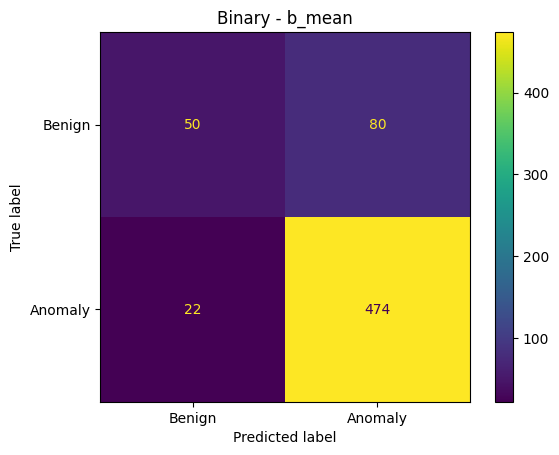

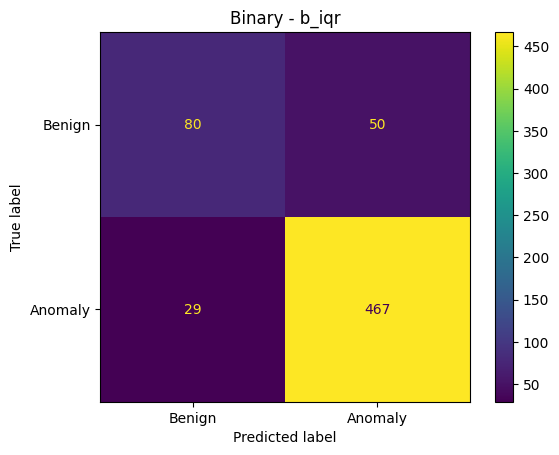

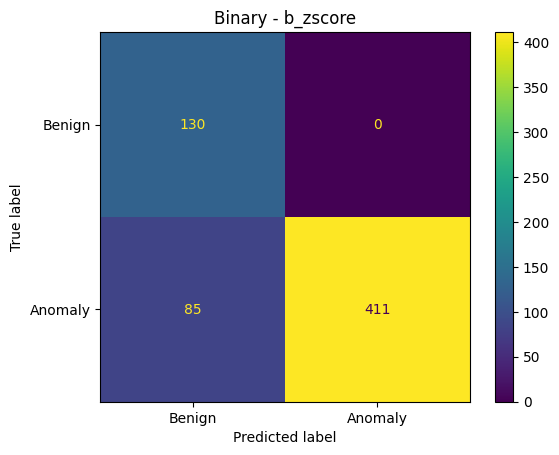

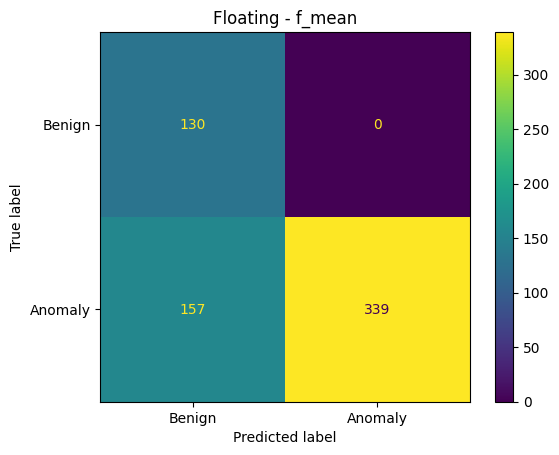

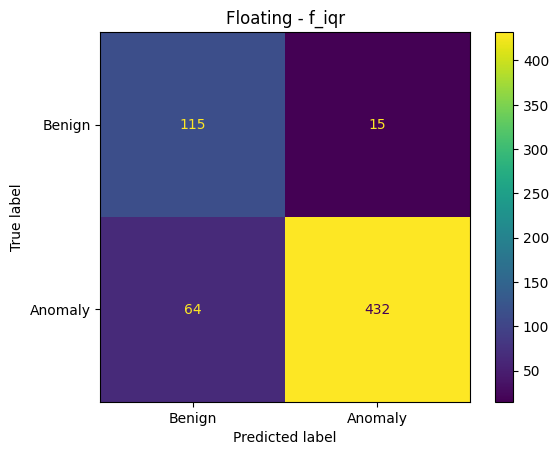

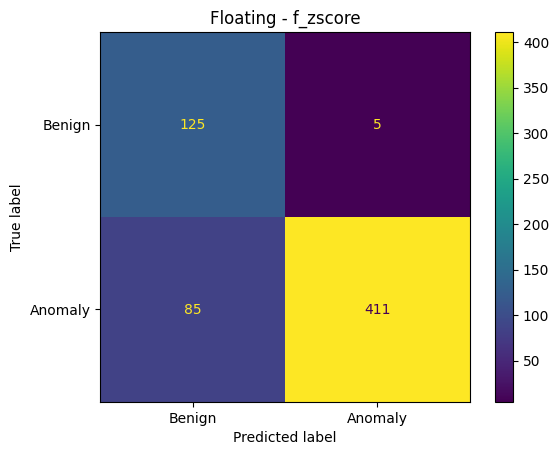

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

for method in methods:
    if method == 'binary':
        for i in threshold:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Binary - {i.strip()}')
            plt.show()
    else:
        for i in threshold_2:
            conf_matrix = confusion_matrix(df_pred['Label'], df_pred[i])
            cm_display = ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels=['Benign', 'Anomaly'])
            cm_display.plot()
            plt.title(f'Floating - {i.strip()}')
            plt.show()


### F2-Score

In [23]:
score['F2 Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Binary-{i}: {f2}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            f2 = ((1+2**2)*tp)/((1+2**2)*tp+2**2*fn+fp)
            score['F2 Score'][i] = f2
            print(f'F2-Floating-{i}: {f2}')

F2-Binary-b_mean: 0.933806146572104
F2-Binary-b_iqr: 0.9336265493802479
F2-Binary-b_zscore: 0.8580375782881002
F2-Floating-f_mean: 0.7296599225139905
F2-Floating-f_iqr: 0.888523241464418
F2-Floating-f_zscore: 0.85625


### FPR Score

In [24]:
score['FPR Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Binary-{i}: {fpr}')
    else:
        for i in threshold_2:
            tn, fp, fn, tp = confusion_matrix(df_pred['Label'], df_pred[i]).ravel()
            fpr = fp/(fp+tn)
            score['FPR Score'][i] = fpr
            print(f'FPR-Floating-{i}: {fpr}')

FPR-Binary-b_mean: 0.6153846153846154
FPR-Binary-b_iqr: 0.38461538461538464
FPR-Binary-b_zscore: 0.0
FPR-Floating-f_mean: 0.0
FPR-Floating-f_iqr: 0.11538461538461539
FPR-Floating-f_zscore: 0.038461538461538464


In [25]:
from sklearn.metrics import accuracy_score

score['Accuracy Score'] = dict()
for method in methods:
    if method == 'binary':
        for i in threshold:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Binary-{i}: {acc}')
    else:
        for i in threshold_2:
            acc = accuracy_score(df_pred['Label'], df_pred[i])
            score['Accuracy Score'][i] = acc
            print(f'Accuracy-Floating-{i}: {acc}')  

Accuracy-Binary-b_mean: 0.8370607028753994
Accuracy-Binary-b_iqr: 0.8738019169329073
Accuracy-Binary-b_zscore: 0.8642172523961661
Accuracy-Floating-f_mean: 0.7492012779552716
Accuracy-Floating-f_iqr: 0.8738019169329073
Accuracy-Floating-f_zscore: 0.8562300319488818


In [26]:
df_score = pd.DataFrame.from_dict(score)
df_score

,Detection Rate,F2 Score,FPR Score,Accuracy Score
b_mean,0.955645,0.933806,0.615385,0.837061
b_iqr,0.941532,0.933627,0.384615,0.873802
b_zscore,0.828629,0.858038,0.000000,0.864217
f_mean,0.683468,0.729660,0.000000,0.749201
f_iqr,0.870968,0.888523,0.115385,0.873802
f_zscore,0.828629,0.856250,0.038462,0.856230


In [27]:
df_score.to_excel('score_ftp_0.0.xlsx')

In [28]:
# %pip install openpyxl